# Analyze LSR BCD Regression Results

In [29]:
#Installing the libraries
%pip install dill
%pip install path
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [30]:
import sys
sys.path.append("/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Stochastic LSR TRR/Experimental Results")
sys.path.append("/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Stochastic LSR TRR/Code Files")
#Import Standard Data Analysis Libraries
import datetime
import numpy as np
import pandas as pd
import re
import scipy.io

#Import dill library to save variables generated
import dill
import pickle
import path
import os
from optimization import calculate_optimal_iterate_and_function_value, objective_function_tensor

In [32]:
pkl_file = "/Users/lakrama/Neuro Project Codes/LSR-Tensor-Ridge-Regression/Stochastic LSR TRR/Experimental Results/ExecutionTime_intercept_5_2024-05-17 04:57:52, n_train_1100,n_test_100, tensor_dimensions:[32 32], tensor_mode_= ranks:[4 4], separation_rank:2, max_iter=50.pkl"

n_train = 1100
n_test = 100

file= open(pkl_file, 'rb')
data = pickle.load(file)
file.close()

X_train_Full = data[0]
Y_train_Full = data[1]
X_test_Full = data[2]
Y_test_Full = data[3]
B_tensored = data[4]
lambda1 = data[5]
validation_normalized_estimation_error = data[6]
validation_nmse_losses = data[7]
validation_correlations = data[8]
validation_R2_scores = data[9]
objective_function_information = data[10]
normalized_estimation_error = data[11]
test_nmse_loss = data[12]
test_R2_loss = data[13]
test_correlation = data[14]
objective_function_values = data[15]

In [33]:
print("Best Lambda: ", lambda1)

Best Lambda:  2.5


p* = 4901.4222328850665
There are no infinite values in the array.


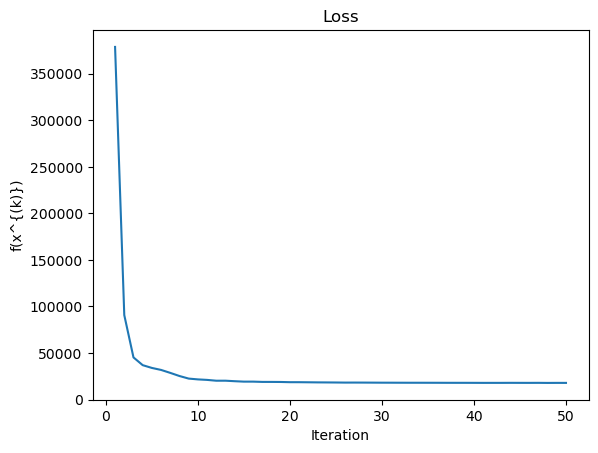

In [34]:
## Plot objective function information
import matplotlib.pyplot as plt

#Get X_train
X_train = X_train_Full[0:(n_train),:,:]
X_train = X_train.reshape((X_train.shape[0], -1))

#Get Y_train
Y_train = Y_train_Full[0:(n_train)].reshape((-1, 1))

#Find x* and p* for optimization problem for the best lambda
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, lambda1)

#Calculate objective function values for best lambda
objective_function_values_flattened = objective_function_values[:,0,2].flatten()
gap_to_optimality = objective_function_values_flattened - p_star

#Print value of p*
print(f"p* = {p_star}")

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(objective_function_values_flattened) + 1), objective_function_values_flattened)
plt.title(r'Loss')
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)})')
plt.show()

p_B_tensored = 8343.642060508162


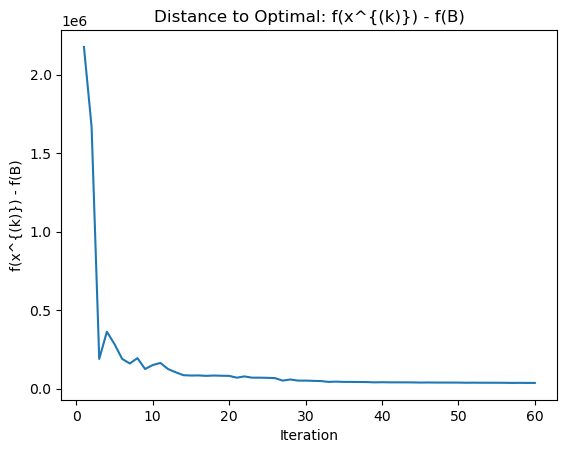

In [6]:
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (lambda1 * (np.linalg.norm(B_tensored_flattened) ** 2))

#Gap to B Tensored Value
gap_to_B_tensored_value = objective_function_values_flattened - p_B_tensored

print(f"p_B_tensored = {p_B_tensored}")

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(r'Distance to Optimal: f(x^{(k)}) - f(B)')
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
# plt.yscale('log')
plt.show()

In [7]:
print(np.linalg.norm(B_optimal - B_tensored_flattened))

32.740193172467926


In [8]:
print(normalized_estimation_error)

0.308145724145246


In [1320]:
experimental_lambda = 0.1
lambda_index = 1

p* = 9.765644425969636
There are infinite values in the array.


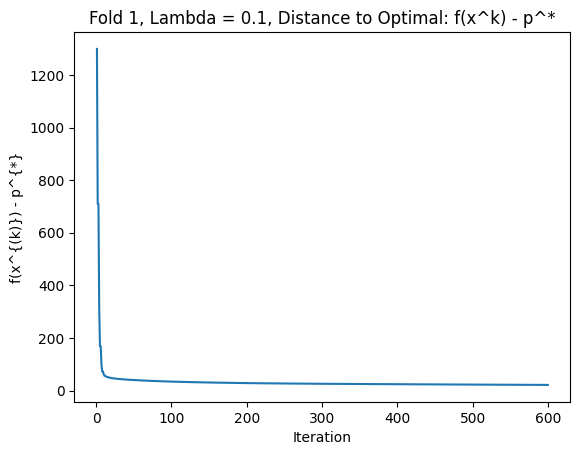

In [1321]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
print(f"p* = {p_star}")
fold = 1
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

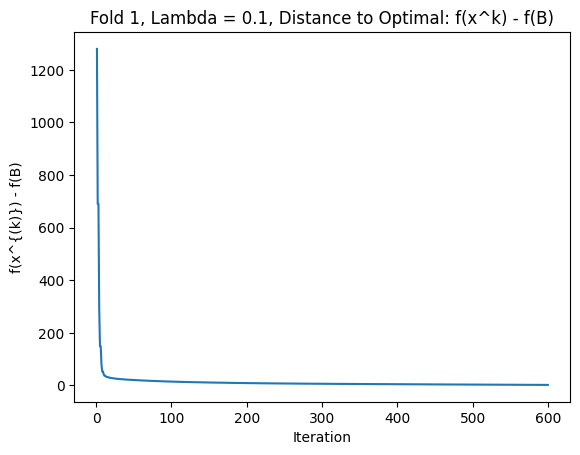

In [1322]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

In [1323]:
#gap_to_B_tensored_value

There are infinite values in the array.


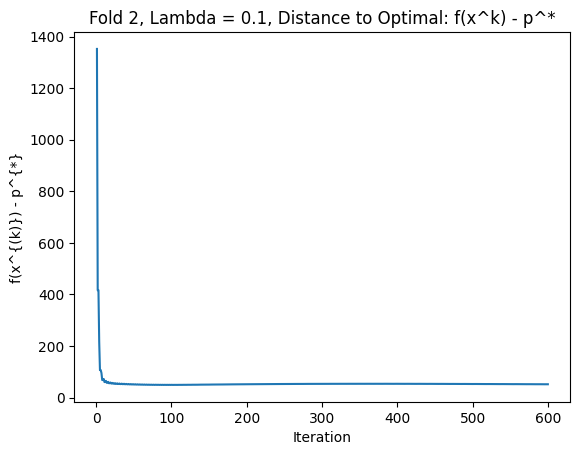

In [1324]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 2
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

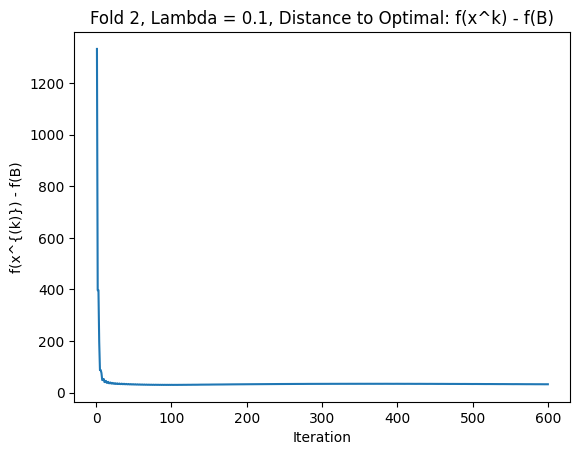

In [1325]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are infinite values in the array.


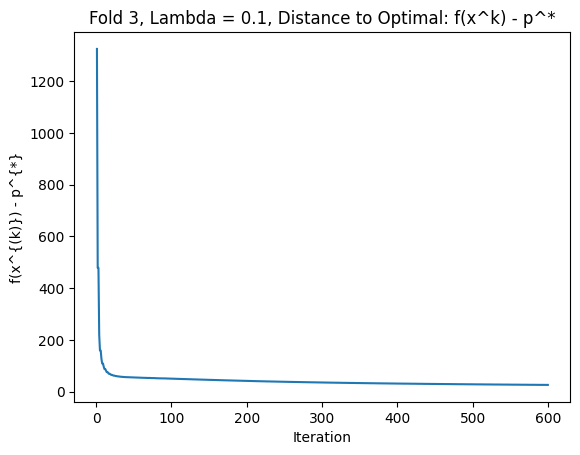

In [1326]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 3
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

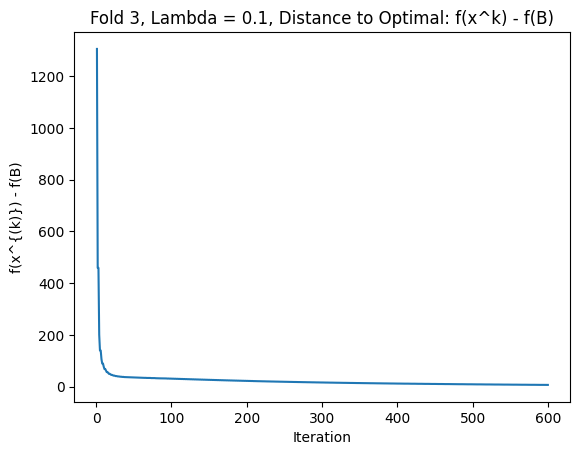

In [1327]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are infinite values in the array.


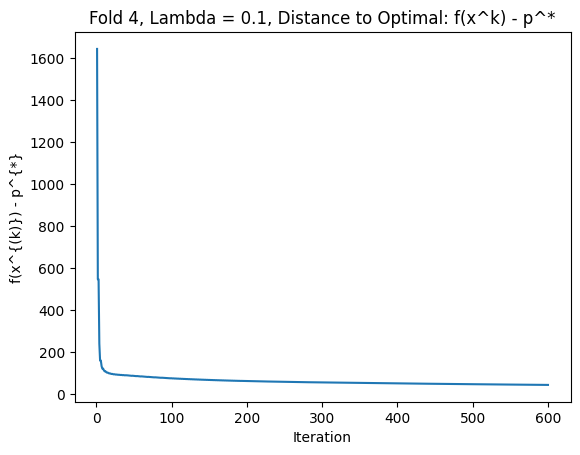

In [1328]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 4
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

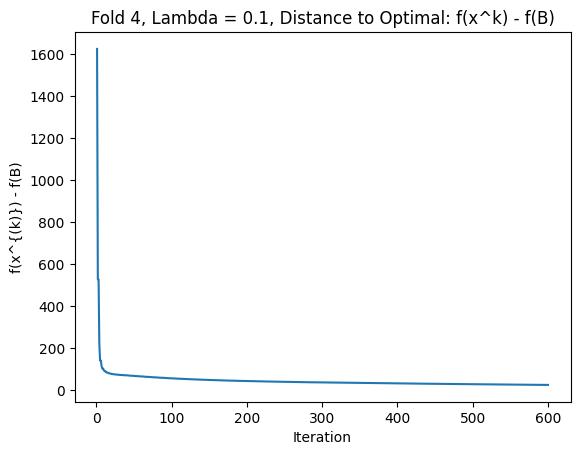

In [1329]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are infinite values in the array.


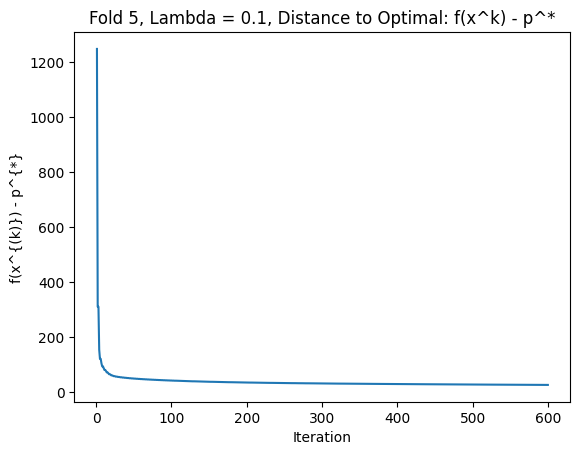

In [1330]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 5
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

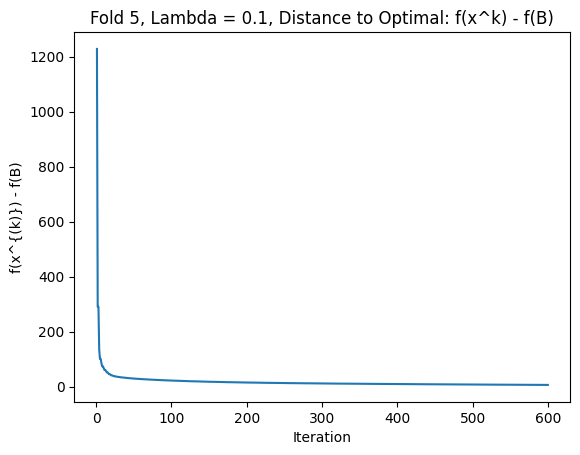

In [1331]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are infinite values in the array.


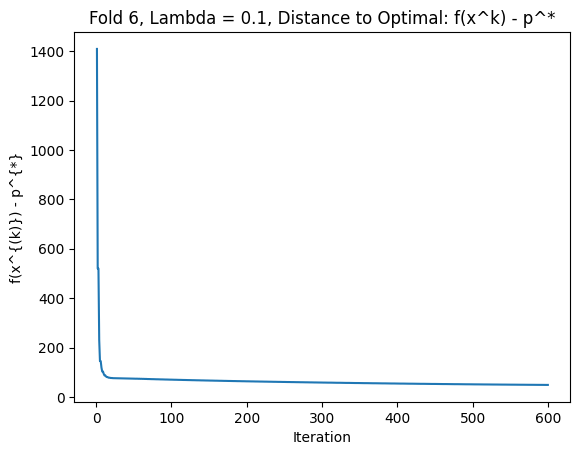

In [1332]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 6
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

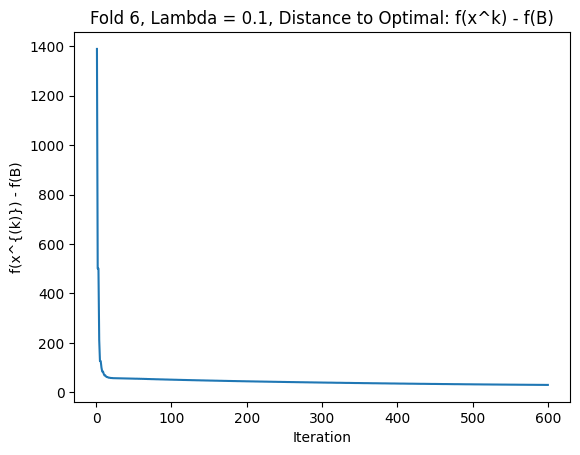

In [1333]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are infinite values in the array.


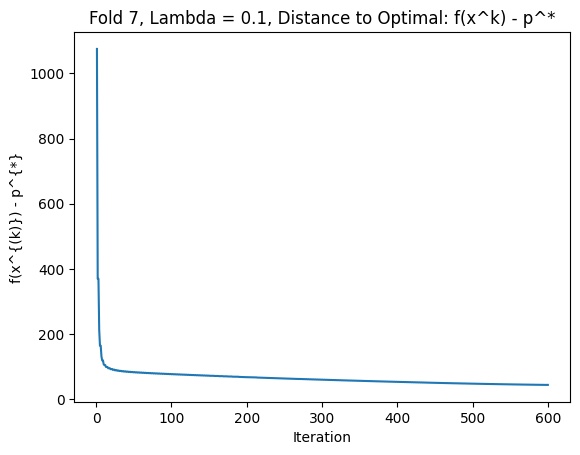

In [1334]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 7
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

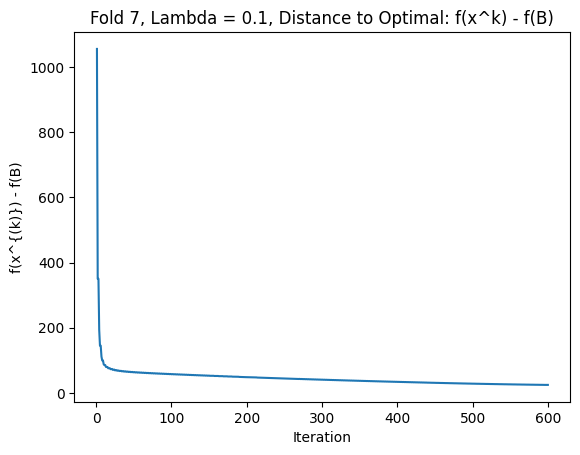

In [1335]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are infinite values in the array.


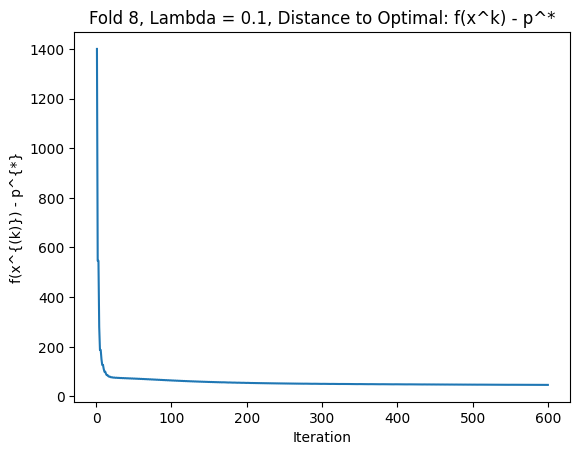

In [1336]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 8
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

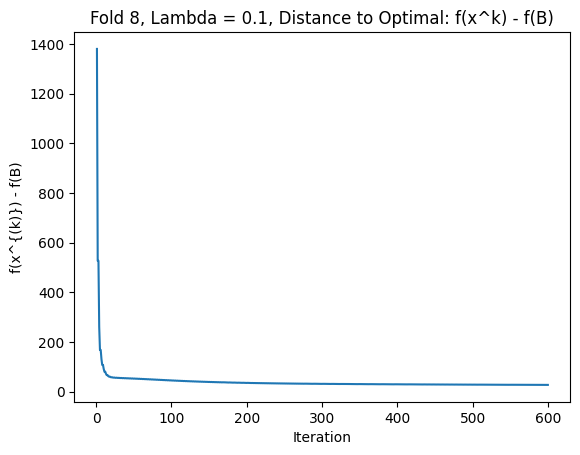

In [1337]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are infinite values in the array.


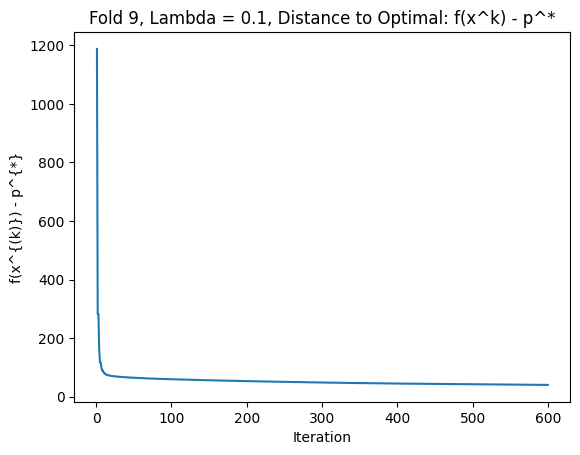

In [1338]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 9
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

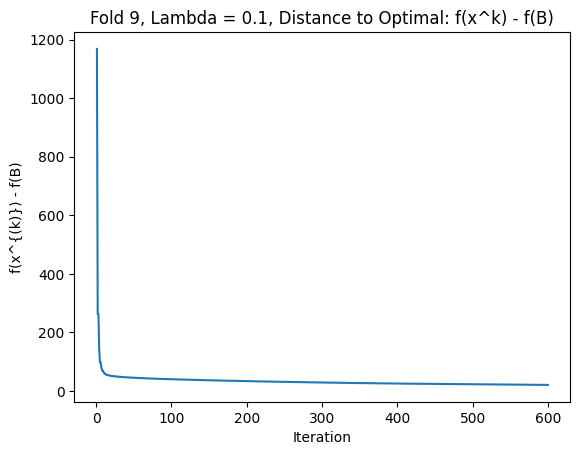

In [1339]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are infinite values in the array.


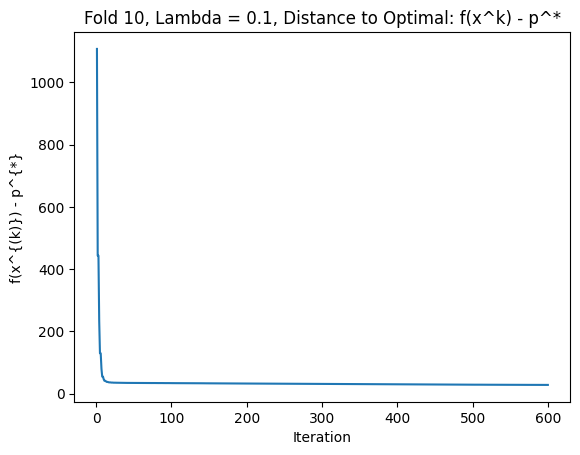

In [1340]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 10
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

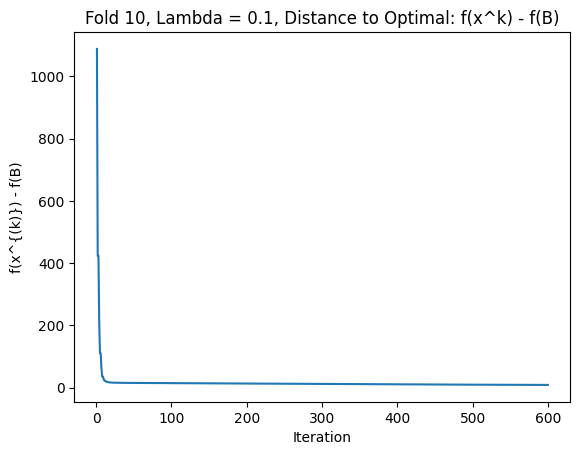

In [1341]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

In [1342]:
validation_normalized_estimation_error[:, lambda_index].flatten()

array([1.04956919, 2.41763678, 1.55834632, 2.4348575 , 1.08042069,
       2.36789933, 1.97157662, 2.37082448, 2.1312468 , 1.50853836])

In [1343]:
validation_correlations[:, lambda_index].flatten()

array([ 0.50903206,  0.29683435,  0.66589498,  0.12918488, -0.18904966,
        0.80957987,  0.42168239,  0.14499486,  0.69058211,  0.59530644])

In [1344]:
validation_R2_scores[:, lambda_index].flatten()

array([-0.11917653, -3.36168082, -1.20908111, -1.793452  , -1.81392615,
       -0.508552  , -1.34580707, -1.59833437,  0.46963483, -0.94219302])

In [1345]:
validation_nmse_losses[:, lambda_index].flatten()

array([0.80415202, 4.19004605, 1.81687012, 2.52889471, 2.79637707,
       1.49125636, 2.11620744, 2.59756753, 0.49801513, 1.84224981])

In [1346]:
normalized_estimation_error

0.07294926109266285

In [1347]:
test_nmse_loss

0.06674645249106681

In [1348]:
test_R2_loss

0.9326459313856883

In [1349]:
test_correlation

0.9685289051326539

In [1350]:
np.linalg.cond(X_train)

4.1357278648106055

In [1351]:
np.linalg.cond(X_train.T @ X_train + 0.1 * np.eye(X_train.shape[1]))

1600.613877134972

In [1352]:
np.linalg.cond(X_train.T @ X_train + 5 * np.eye(X_train.shape[1]))

32.99227754268337